In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/")

from glob import glob
path_files = "/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_diff_L_LS/alpha_no_optical_{}mm.root"
file_list = glob(path_files.format("*"))
print(file_list)

from LoadMultiFiles import LoadOneFileUproot
from copy import copy

from importlib import reload
import FunctionFor_dE_dx
reload(FunctionFor_dE_dx)
from FunctionFor_dE_dx import GetDirForNoOpticalAnalyze

dir_LS_diff_L = {}
dir_geninfo_diff_L = {}
dir_dE_dx_diff_L = {}
dir_key_to_float = {}
for file in file_list:
    key = file.split("_")[-1].split("mm.root")[0]
    key_float  = float(key)
    dir_key_to_float[key] = key_float
tuple_key_to_float_sorted = sorted(dir_key_to_float.items(), key=lambda x: x[1])
print(tuple_key_to_float_sorted)
list_filter = ["step_x", "step_y", "step_z", "step_t", "center_Edep"]

for key in tuple_key_to_float_sorted:
    key = key[0]
    file = path_files.format(key)
    dir_LS = LoadOneFileUproot(file, name_branch="GdLS_log",list_branch_filter=list_filter,
                           return_list=False)
    dir_geninfo = LoadOneFileUproot(file, name_branch="genInfo",
                           return_list=False)
    pdgID_certain,dir_dE_dx =GetDirForNoOpticalAnalyze(dir_LS,dir_geninfo)
    dir_LS_diff_L[key] = copy(dir_LS)
    dir_geninfo_diff_L[key] = copy(dir_geninfo)
    dir_dE_dx_diff_L[key] = copy(dir_dE_dx)

['/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_diff_L_LS/alpha_no_optical_10mm.root', '/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_diff_L_LS/alpha_no_optical_3mm.root', '/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_diff_L_LS/alpha_no_optical_2mm.root', '/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_diff_L_LS/alpha_no_optical_20mm.root', '/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_diff_L_LS/alpha_no_optical_15mm.root', '/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_diff_L_LS/alpha_no_optical_5mm.root', '/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_diff_L_LS/alpha_no_optical_1mm.root']
[('1', 1.0), ('2', 2.0), ('3', 3.0), ('5', 5.0), ('10', 10.0), ('15', 15.0), ('20', 20.0)]


dict_keys(['Einit', 'dE_dx', 'dE_dx_main_track', 'Equench', 'Edep', 'dx', 'index'])
[1000020040 1000020040 1000020040 1000020040 1000020040 1000020040
 1000020040 1000020040 1000020040 1000020040 1000020040 1000020040
 1000020040 1000020040 1000020040 1000020040 1000020040 1000020040
 1000020040 1000020040 1000020040 1000020040 1000020040 1000020040
 1000020040 1000020040 1000020040 1000020040 1000020040 1000020040
 1000020040 1000020040 1000020040 1000020040 1000020040 1000020040
 1000020040 1000020040 1000020040 1000020040 1000020040 1000020040
 1000020040 1000020040 1000020040 1000020040 1000020040 1000020040
 1000020040 1000020040 1000020040 1000020040 1000020040 1000020040
 1000020040 1000020040 1000020040 1000020040 1000020040 1000020040
 1000020040 1000020040 1000020040 1000020040 1000020040 1000020040
 1000020040 1000020040 1000020040 1000020040 1000020040 1000020040
 1000020040 1000020040 1000020040 1000020040 1000020040 1000020040
 1000020040 1000020040 1000020040 1000020040 

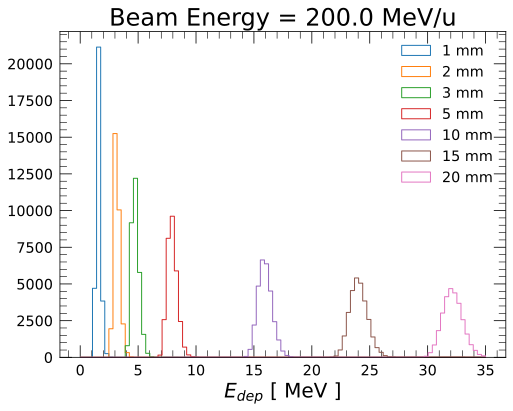

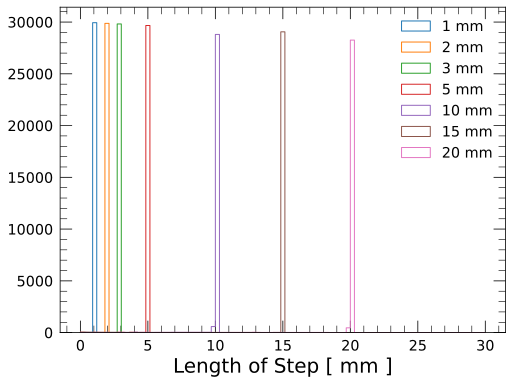

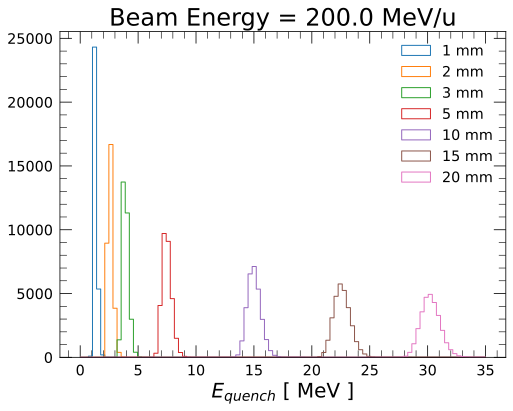

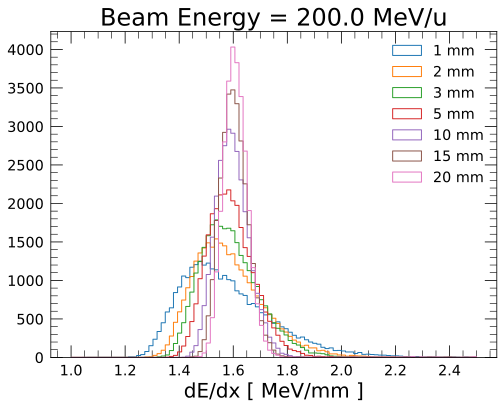

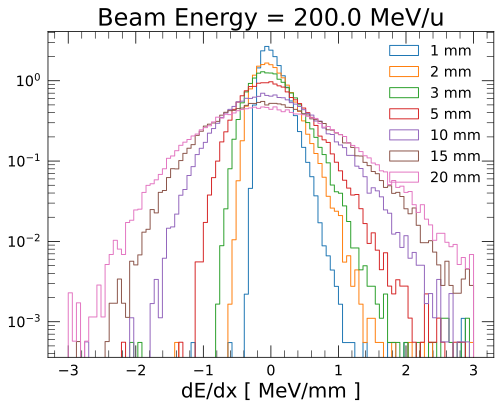

In [2]:
print(dir_dE_dx.keys())
print(dir_LS["step_pdgID"][0])
E_down = 0
E_up = 35
E_u =dir_dE_dx['Einit'][0]/4

for key in dir_LS_diff_L.keys():
    dir_dE_dx = dir_dE_dx_diff_L[key]

    key = f"{key} mm"
    plt.figure(1)
    plt.hist(dir_dE_dx["Edep"],bins=np.linspace(E_down,E_up,100),histtype="step",
             label=key)
    # plt.semilogy()
    plt.xlabel("$E_{dep}$ [ MeV ]")
    plt.title(f"Beam Energy = {E_u} MeV/u")
    plt.legend()

    plt.figure(7)
    plt.hist(dir_dE_dx["dx"],bins=np.linspace(0,30,100),histtype="step",
                 label=key)
    plt.xlabel("Length of Step [ mm ]")
    plt.legend()

    plt.figure(2)
    plt.hist(dir_dE_dx["Equench"],bins=np.linspace(E_down,E_up,100), histtype="step",
             label=key)
    plt.xlabel("$E_{quench}$ [ MeV ]")
    plt.title(f"Beam Energy = {E_u} MeV/u")
    plt.legend()
    # plt.semilogy()

    plt.figure(3)
    plt.hist(dir_dE_dx["dE_dx_main_track"],bins=np.linspace(1,2.5,100),histtype="step",
             label=key)
    plt.xlabel("dE/dx [ MeV/mm ]")
    plt.title(f"Beam Energy = {E_u} MeV/u")
    plt.legend()
    # plt.semilogy()

    plt.figure(4)
    plt.hist(dir_dE_dx["Edep"]-np.median(dir_dE_dx["Edep"]),bins=np.linspace(-3,3,100),histtype="step",
             label=key,density=True)
    plt.xlabel("dE/dx [ MeV/mm ]")
    plt.title(f"Beam Energy = {E_u} MeV/u")
    plt.legend()
    plt.semilogy()

In [ ]:
import pandas as pd
import seaborn as sns
from IPython.display import display
from PandasTools import AlignDirElements
df_dE_dx = pd.DataFrame()

for i, L_LS in enumerate(dir_dE_dx_diff_L.keys()):
    dir_dE_dx_diff_L[L_LS]["L_LS"] = L_LS
    if i==0:
        df_dE_dx = pd.DataFrame.from_dict(AlignDirElements(dir_dE_dx_diff_L[L_LS]))
    else:
        df_dE_dx = df_dE_dx.append(pd.DataFrame.from_dict(AlignDirElements(dir_dE_dx_diff_L[L_LS])))
display(df_dE_dx)
sns.boxplot(y="Edep",x="L_LS", data=df_dE_dx)
plt.ylim(0,40)
plt.figure()
sns.boxplot(y="dx",x="L_LS", data=df_dE_dx)
# plt.ylim(1,10)



In [ ]:
from matplotlib.colors import LogNorm
for key in ['0.1','1','3']:
    v_n_tracks = []
    v_dE_dx = []
    dir_dE_dx = dir_dE_dx_diff_L[key]
    dir_LS = dir_LS_diff_L[key]
    # index = (dir_dE_dx["dE_dx"]>2.5) & (dir_dE_dx["dE_dx"]<3)
    for i,v_track in enumerate(dir_LS["step_trackID"][dir_dE_dx["index"]]):
        v_n_tracks.append(len(set(v_track)))
        v_dE_dx.append(dir_dE_dx["dE_dx"][i])
    plt.figure()
    plt.hist2d(v_n_tracks, v_dE_dx, bins=(range(0,8), np.linspace(1,2.5,100)),cmap="Blues")
    plt.colorbar()
    plt.xlabel("N of Tracks")
    plt.ylabel("dE/dx [ MeV/mm ]")
    plt.title(f"{key} mm")

In [ ]:
for key in ['0.1','1','3','10']:
    v_dE_dx_e = []
    v_dE_dx_alpha = []
    dir_dE_dx = dir_dE_dx_diff_L[key]
    dir_LS = dir_LS_diff_L[key]
    index_analyze = dir_dE_dx["index"]
    # index = (dir_dE_dx["dE_dx"]>2.5) & (dir_dE_dx["dE_dx"]<3)
    for i in index_analyze:
        index_e = (dir_LS["step_pdgID"][i]==11)
        index_alpha = (dir_LS["step_pdgID"][i]==1000020040)
        if np.any(index_e) and np.sum(dir_LS["step_Equench"][i][index_e])>0:
            v_dE_dx_e.append(np.sum(dir_LS["step_Equench"][i][index_e]*dir_LS["step_Edep"][i][index_e]/dir_LS["step_dx"][i][index_e])/np.sum(dir_LS["step_Equench"][i][index_e]))
            v_dE_dx_alpha.append(np.sum(dir_LS["step_Equench"][i][index_alpha]*dir_LS["step_Edep"][i][index_alpha]/dir_LS["step_dx"][i][index_alpha])/np.sum(dir_LS["step_Equench"][i][index_alpha]))
        # v_dE_dx.append(dir_LS["step_Edep"][index_analyze])
    plt.figure("Electron")
    plt.hist(v_dE_dx_e,bins=np.linspace(0,2.5,100),histtype="step", label=f"{key}mm")
    plt.xlabel("dE/dx [ MeV/mm ]")
    plt.title("Secondary Electron")
    plt.legend()

    plt.figure("Alpha")
    plt.hist(v_dE_dx_alpha,bins=np.linspace(0,2.5,100),histtype="step", label=f"{key}mm" )
    plt.xlabel("dE/dx [ MeV/mm ]")
    plt.title("Alpha")
    plt.semilogy()
    plt.legend()